Age effect - Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [ ]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

In [1]:
source("install_libraries.R")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.2 (2017-09-28).
Installing package(s) ‘DESeq2’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'backports', 'BH', 'bindr', 'biomaRt', 'callr', 'caret', 'curl',
  'DBI', 'dbplyr', 'ddalpha', 'digest', 'DRR', 'forcats', 'foreach',
  'GenomeInfoDbData', 'GenomicFeatures', 'GenomicRanges', 'haven', 'hexbin',
  'Hmisc', 'hms', 'htmlTable', 'httpuv', 'igraph', 'iterators', 'knitr',
  'lava', 'lubridate', 'matrixStats', 'mgcv', 'nlme', 'openssl', 'pbdZMQ',
  'pryr', 'quantmod', 'Rcpp', 'RcppArmadillo', 'RCurl', 'recipes', 'reprex',
  'reshape2', 'rlang', 'rmarkdown', 'RMySQL', 'rpart', 'rprojroot',
  'rtracklayer', 'selectr', 'sfsmisc', 'stringi', 'stringr',
  'SummarizedExperiment', 'tibble', 'tidyr', 'tidyselect', 'timeDate', 'TTR',
  'withr', 'XML', 'xml2', 'xts', 'zoo'
Updating HTML index 

In [2]:
source("load_libraries.R")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*





Attaching package: ‘WGCNA’

The following object is masked from ‘package:IRanges’:

    cor

The following object is masked from ‘package:S4Vectors’:

    cor

The following object is masked from ‘package:stats’:

    cor



Allowing multi-threading with up to 4 threads.



Attaching package: ‘igraph’

The following object is masked from ‘package:GenomicRanges’:

    union

The following object is masked from ‘package:IRanges’:

    union

The following object is masked from ‘package:S4Vectors’:

    union

The following objects are masked from ‘package:BiocGenerics’:

    normalize, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: DOSE
DOSE v3.4.0  For help: https://guangchuangyu.github.io/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609


Attaching package: ‘DOSE’

The following objects are masked from ‘package:GOSemSim’:

    clusterSim, geneSim, mclusterSim

clusterProfiler v3.6.0  For help: https://guangchuangyu.github.io/clusterProfiler


In [123]:
source("functions.R")

## Data

In [4]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [5]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [6]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

# Global stats

In [ ]:
# Interactions between ages and types (after controlling gender)
SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,0), alpha=0.05, test="Wald")
GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,1), alpha=0.05, test="Wald")
SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,0,0), alpha=0.05, test="Wald")
GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,1,0), alpha=0.05, test="Wald")
SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,0,0), alpha=0.05, test="Wald")
GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,1,-1), alpha=0.05, test="Wald")
# Stats
age_type_stats = matrix(0, nrow=6, ncol=3)
rownames(age_type_stats) = c("52w VS 8w (SPF)","52w VS 8w (GF)", "104w VS 8w (SPF)", "104w VS 8w (GF)", "104w VS 52w (SPF)", "104w VS 52w (GF)")
colnames(age_type_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_type_stats[1,] = get_stats_padj(SPF_52w_8w)
age_type_stats[2,] = get_stats_padj(GF_52w_8w)
age_type_stats[3,] = get_stats_padj(SPF_104w_8w)
age_type_stats[4,] = get_stats_padj(GF_104w_8w)
age_type_stats[5,] = get_stats_padj(SPF_104w_52w)
age_type_stats[6,] = get_stats_padj(GF_104w_52w)
age_type_stats

In [ ]:
# Interactions between ages and genders (after controlling type)
F_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1/2), alpha=0.05, test="Wald")
M_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1/2), alpha=0.05, test="Wald")
F_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1/2,0), alpha=0.05, test="Wald")
M_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1/2,0), alpha=0.05, test="Wald")
F_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1/2,-1/2), alpha=0.05, test="Wald")
M_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1/2,-1/2), alpha=0.05, test="Wald")
# Stats
age_gender_stats = matrix(0, nrow=6, ncol=3)
rownames(age_gender_stats) = c("52w VS 8w (F)","52w VS 8w (M)", "104w VS 8w (F)", "104w VS 8w (M)", "104w VS 52w (F)", "104w VS 52w (M)")
colnames(age_gender_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_gender_stats[1,] = get_stats_padj(F_52w_8w)
age_gender_stats[2,] = get_stats_padj(M_52w_8w)
age_gender_stats[3,] = get_stats_padj(F_104w_8w)
age_gender_stats[4,] = get_stats_padj(M_104w_8w)
age_gender_stats[5,] = get_stats_padj(F_104w_52w)
age_gender_stats[6,] = get_stats_padj(M_104w_52w)
age_gender_stats

In [ ]:
# Interactions between ages, types and genders
F_SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1), alpha=0.05, test="Wald")
M_SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,0), alpha=0.05, test="Wald")
M_GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1), alpha=0.05, test="Wald")
F_SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1,0), alpha=0.05, test="Wald")
M_SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,0,0), alpha=0.05, test="Wald")
M_GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1,0), alpha=0.05, test="Wald")
F_SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1,-1), alpha=0.05, test="Wald")
M_SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,0,0), alpha=0.05, test="Wald")
M_GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1,-1), alpha=0.05, test="Wald")
# Stats
age_gender_type_stats = matrix(0, nrow=12, ncol=3)
rownames(age_gender_type_stats) = c("52w VS 8w (F, SPF)","52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)", "104w VS 52w (F, SPF)", "104w VS 52w (F, GF)", "104w VS 52w (M, SPF)", "104w VS 52w (M, GF)")
colnames(age_gender_type_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_gender_type_stats[1,] = get_stats_padj(F_SPF_52w_8w)
age_gender_type_stats[2,] = get_stats_padj(F_GF_52w_8w)
age_gender_type_stats[3,] = get_stats_padj(M_SPF_52w_8w)
age_gender_type_stats[4,] = get_stats_padj(M_GF_52w_8w)
age_gender_type_stats[5,] = get_stats_padj(F_SPF_104w_8w)
age_gender_type_stats[6,] = get_stats_padj(F_GF_104w_8w)
age_gender_type_stats[7,] = get_stats_padj(M_SPF_104w_8w)
age_gender_type_stats[8,] = get_stats_padj(M_GF_104w_8w)
age_gender_type_stats[9,] = get_stats_padj(F_SPF_104w_52w)
age_gender_type_stats[10,] = get_stats_padj(F_GF_104w_52w)
age_gender_type_stats[11,] = get_stats_padj(M_SPF_104w_52w)
age_gender_type_stats[12,] = get_stats_padj(M_GF_104w_52w)
age_gender_type_stats

# Comparison between the ages (after controlling for type and gender)
Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?

In [7]:
# Comparison between the ages (after controlling for type and gender)
global_52w_8w = results(dge, contrast= c(0,0,0,0,1,0,1/2,0,0,1/2), alpha=0.05, test="Wald")
global_104w_8w = results(dge, contrast= c(0,0,0,1,0,1/2,0,0,1/2,0), alpha=0.05, test="Wald")
global_104w_52w = results(dge, contrast= c(0,0,0,1,-1,1/2,-1/2,0,1/2,-1/2), alpha=0.05, test="Wald")

In [8]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')

## Stats

In [ ]:
global_stats = matrix(0, nrow=3, ncol=3)
rownames(global_stats) = c("52w VS 8w", "104w VS 8w", "104w VS 52w")
colnames(global_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
global_stats[1,] = get_stats_padj(global_52w_8w)
global_stats[2,] = get_stats_padj(global_104w_8w)
global_stats[3,] = get_stats_padj(global_104w_52w)
global_stats

## Differentially expressed genes

In [9]:
age_data = list(global_52w_8w, global_104w_8w, global_104w_52w)
names(age_data) = c("52w VS 8w", "104w VS 8w", "104w VS 52w")
age_deg = extract_diff_expr_genes(age_data, "age_data")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Loading required package: GenomicFeatures
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Foun

In [10]:
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])

## Counts

In [ ]:
# 52w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>1),1])))
plot_count_heatmap(genes,samples, annot)

In [ ]:
# 104w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,2])>1),2])))
plot_count_heatmap(genes,samples, annot)

In [ ]:
# 104w != 52w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

## Compare the numbers

In [ ]:
# Differentially expressed genes
upset(as.data.frame(age_deg$deg))

In [ ]:
# Differentially more expressed genes
upset(as.data.frame(age_deg$pos))

In [ ]:
# Differentially less expressed genes
upset(as.data.frame(age_deg$neg))

## Compare the intersections in term of expressions

In [ ]:
# Genes that are differentially expressed in 52W vs 8W and in 104W vs 8W (and not in 104w vs 52w)
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & is.na(age_deg$fc_deg[,3]),c(1,2)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 8w", "52w > 8w & 104w < 8w", "52w < 8w & 104w > 8w", "52w < 8w & 104w < 8w")
rep

In [ ]:
# 52w != 8w and 104w != 8w and 104w == 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & is.na(age_deg$fc_deg[,3])),1])))
plot_count_heatmap(genes,samples, annot)

In [ ]:
# Genes that are differentially expressed in 52W vs 8W and in 104W vs 52W (and not in 104w vs 52w)
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,3)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 52w", "52w > 8w & 104w < 52w", "52w < 8w & 104w > 52w", "52w < 8w & 104w < 52w")
rep

In [ ]:
# 52w != 8w and 104w == 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & is.na(age_deg$fc_deg[,2]) & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

In [ ]:
# Genes that are differentially expressed in 104W vs 8W and in 104W vs 52W (and not in 52w vs 8w)
fc = age_deg$fc_deg[is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(2,3)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("104w > 8w & 104w > 52w", "104w > 8w & 104w < 52w", "104w < 8w & 104w > 52w", "104w < 8w & 104w < 52w")
rep

In [ ]:
# 52w == 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(is.na(age_deg$fc_deg[,1]) & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),2])))
plot_count_heatmap(genes,samples, annot)

In [ ]:
# Genes that are differentially expressed in 52W vs 8W, in 104W vs 8W and in 104W vs 52W
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,2,3)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition_3col(fc)
colnames(rep) = c(
    "52w > 8w & 104w > 8w & 104w > 52w",
    "52w > 8w & 104w > 8w & 104w < 52w",
    "52w > 8w & 104w < 8w & 104w > 52w",
    "52w > 8w & 104w < 8w & 104w < 52w",
    "52w < 8w & 104w > 8w & 104w > 52w",
    "52w < 8w & 104w > 8w & 104w < 52w",
    "52w < 8w & 104w < 8w & 104w > 52w",
    "52w < 8w & 104w < 8w & 104w < 52w")
rep

In [ ]:
# 52w != 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

## DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

In [ ]:
# 52w VS 8w
col_52w_vs_8w = get_deg_colors(age_deg, "52w VS 8w", connected_gene_colors, module_nb) 
plot_net_with_fr_layout(net, col_52w_vs_8w, pal2)

In [ ]:
# 104w VS 52w
col_104w_vs_52w = get_deg_colors(age_deg, "104w VS 52w", connected_gene_colors, module_nb) 
plot_net_with_fr_layout(net, col_104w_vs_52w, pal2)

## GO analysis

In [99]:
full_go_desc = age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = age_deg$GO_wall[[1]][,"category"]

### Biological process

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(age_deg$over_represented_GO,
            age_deg$GO_wall,
            "BP",
            c("52w VS 8w", "104w VS 8w", "104w VS 52w"),
            20)

Network based on description similarity

In [111]:
ont = "BP"
BP_network = create_GO_network(age_deg, ont, BP_GO)
over_repr_BP = get_ont_GO(age_deg$over_represented_GO, ont)
under_repr_BP = get_ont_GO(age_deg$under_represented_GO, ont)

HTML widgets cannot be represented in plain text (need html)

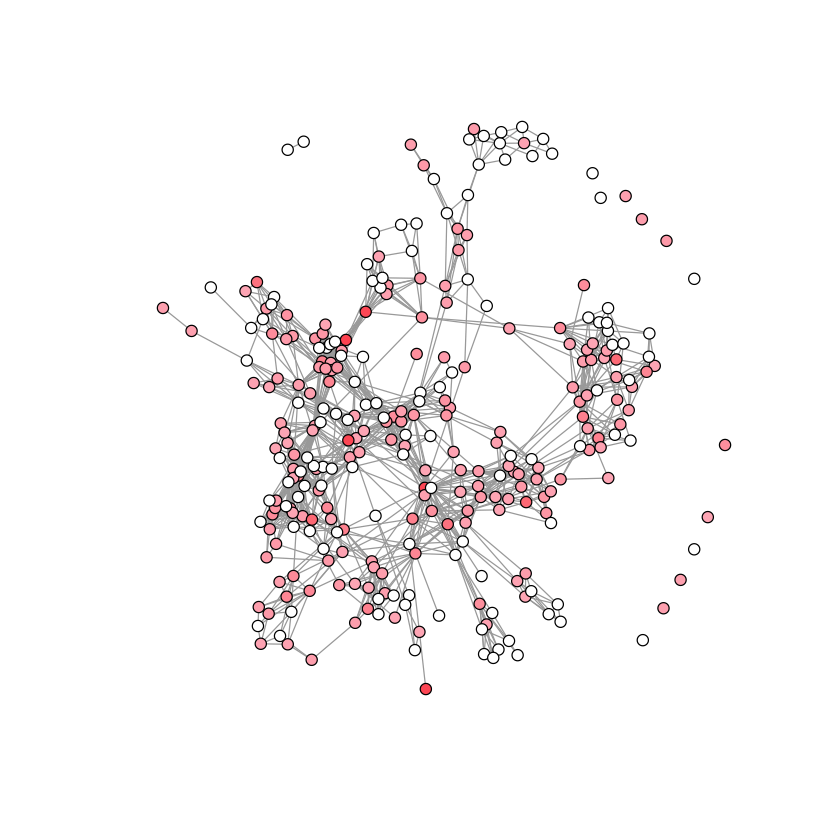

In [120]:
# 52w VS 8w
plot_GO_network(over_repr_BP, under_repr_BP, BP_network, "52w VS 8w")
plot_interactive_GO_network(over_repr_BP, under_repr_BP, BP_network, "52w VS 8w", full_go_desc)

HTML widgets cannot be represented in plain text (need html)

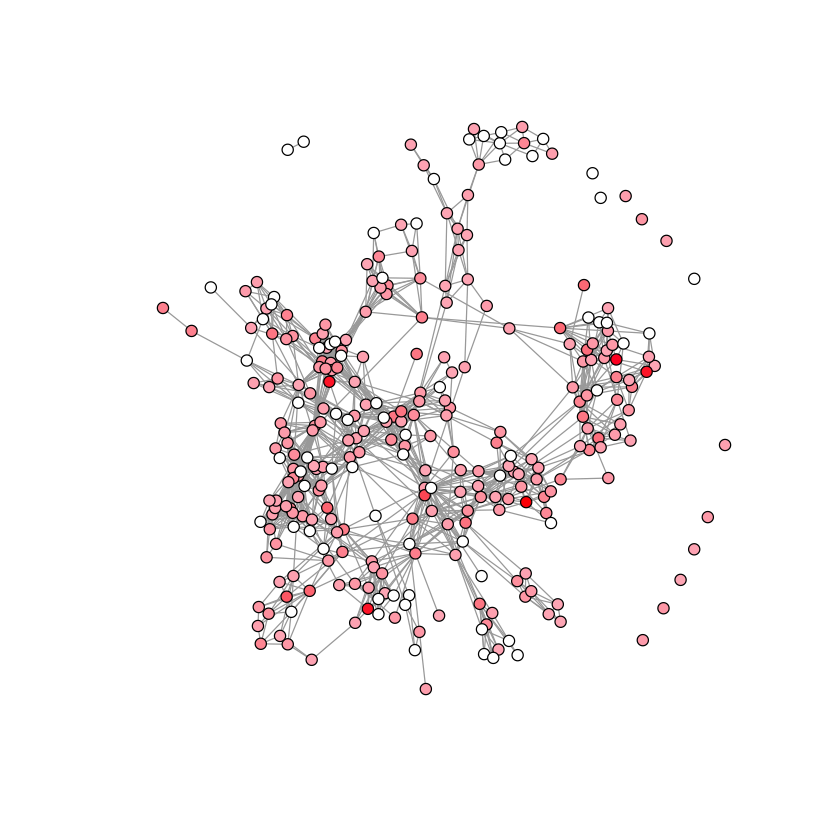

In [119]:
# 104w VS 52w
plot_GO_network(over_repr_BP, under_repr_BP, BP_network, "104w VS 52w")
plot_interactive_GO_network(over_repr_BP, under_repr_BP, BP_network, "104w VS 52w", full_go_desc)

HTML widgets cannot be represented in plain text (need html)

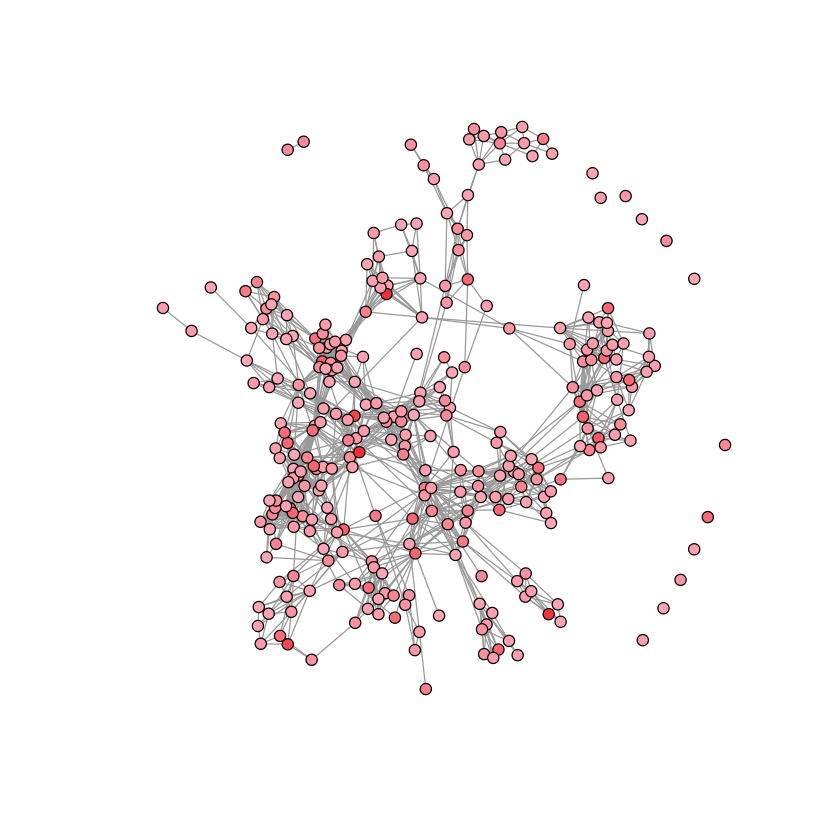

In [118]:
# 104w VS 8w
plot_GO_network(over_repr_BP, under_repr_BP, BP_network, "104w VS 8w")
plot_interactive_GO_network(over_repr_BP, under_repr_BP, BP_network, "104w VS 8w", full_go_desc)

### Cellular components

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(age_deg$over_represented_GO,
            age_deg$GO_wall,
            "CC",
            c("52w VS 8w", "104w VS 8w", "104w VS 52w"),
            20)

Network based on description similarity

In [121]:
ont = "CC"
CC_network = create_GO_network(age_deg, ont, CC_GO)
over_repr_CC = get_ont_GO(age_deg$over_represented_GO, ont)
under_repr_CC = get_ont_GO(age_deg$under_represented_GO, ont)

HTML widgets cannot be represented in plain text (need html)

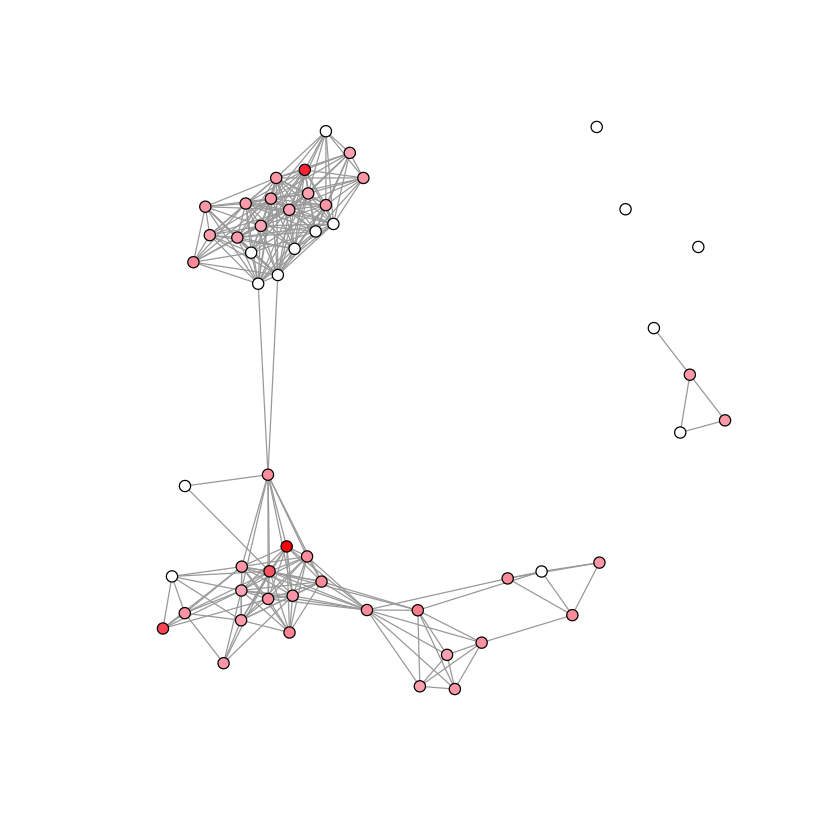

In [124]:
# 52w VS 8w
plot_GO_network(over_repr_CC, under_repr_CC, CC_network, "52w VS 8w")
plot_interactive_GO_network(over_repr_CC, under_repr_CC, CC_network, "52w VS 8w", full_go_desc)

HTML widgets cannot be represented in plain text (need html)

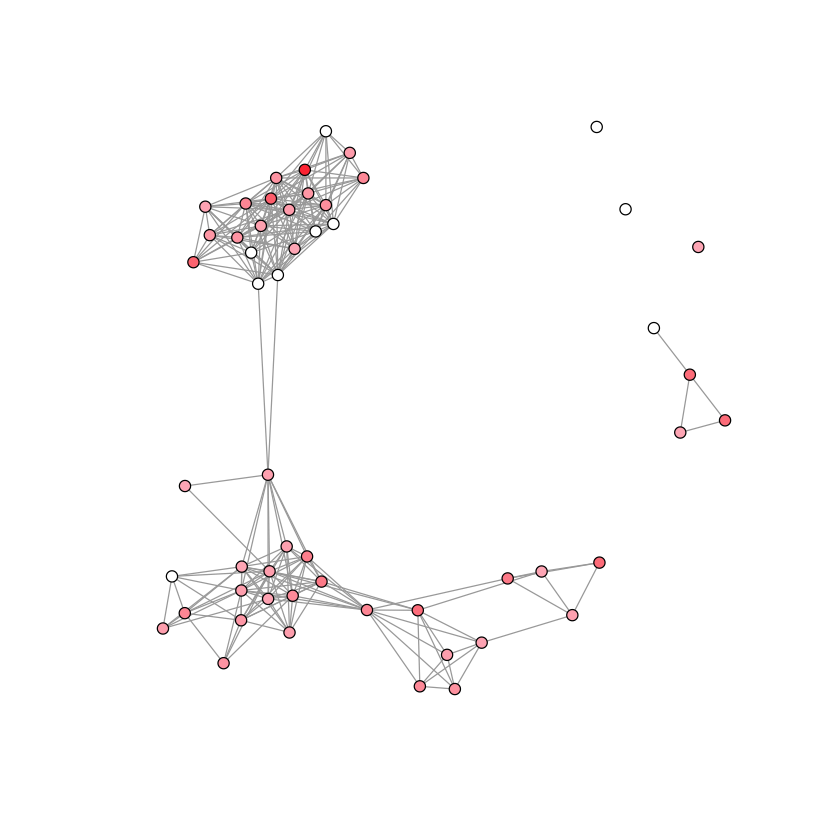

In [125]:
# 104w VS 52w
plot_GO_network(over_repr_CC, under_repr_CC, CC_network, "104w VS 52w")
plot_interactive_GO_network(over_repr_CC, under_repr_CC, CC_network, "104w VS 52w", full_go_desc)

HTML widgets cannot be represented in plain text (need html)

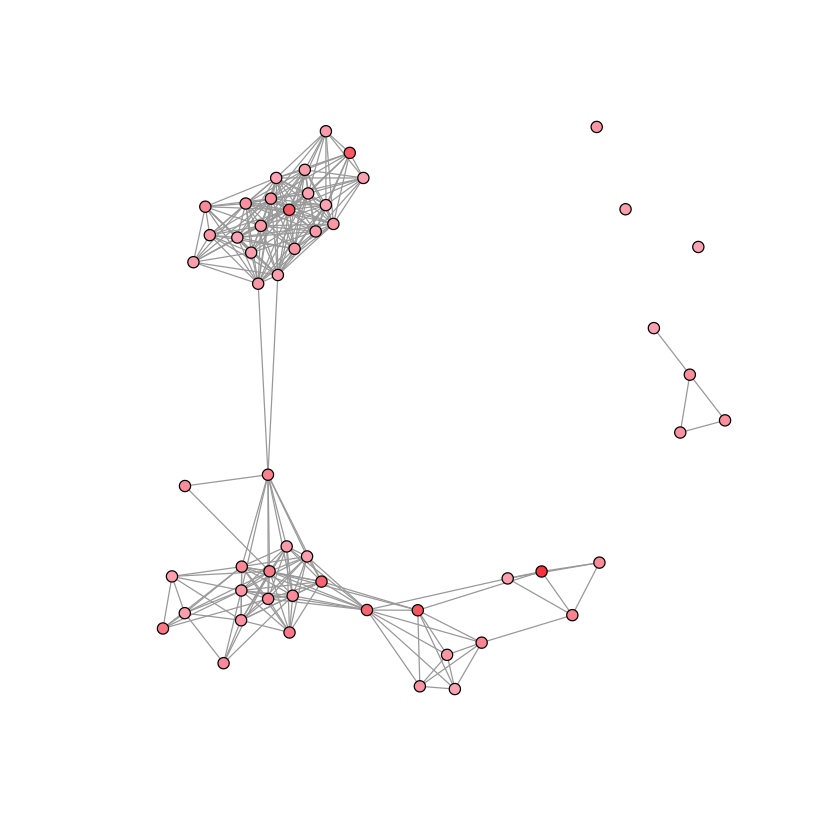

In [126]:
# 104w VS 8w
plot_GO_network(over_repr_CC, under_repr_CC, CC_network, "104w VS 8w")
plot_interactive_GO_network(over_repr_CC, under_repr_CC, CC_network, "104w VS 8w", full_go_desc)

### Molecular functions

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(age_deg$over_represented_GO,
            age_deg$GO_wall,
            "MF",
            c("52w VS 8w", "104w VS 8w", "104w VS 52w"),
            20)

Network based on description similarity

In [128]:
ont = "MF"
MF_network = create_GO_network(age_deg, ont, MF_GO)
over_repr_MF = get_ont_GO(age_deg$over_represented_GO, ont)
under_repr_MF = get_ont_GO(age_deg$under_represented_GO, ont)

HTML widgets cannot be represented in plain text (need html)

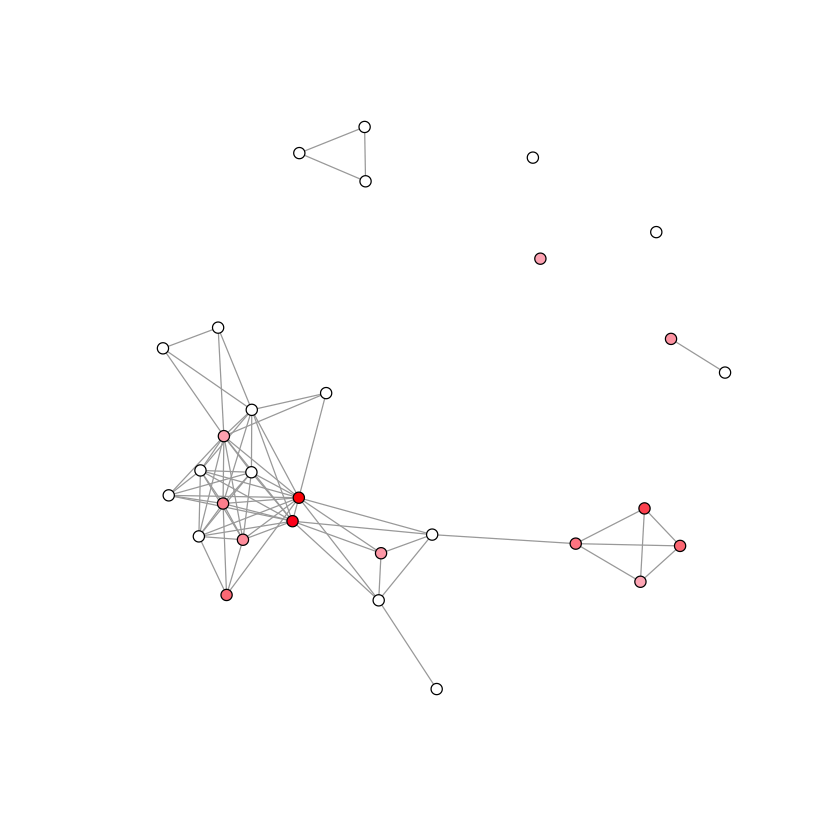

In [129]:
# 52w VS 8w
plot_GO_network(over_repr_MF, under_repr_MF, MF_network, "52w VS 8w")
plot_interactive_GO_network(over_repr_MF, under_repr_MF, MF_network, "52w VS 8w", full_go_desc)

HTML widgets cannot be represented in plain text (need html)

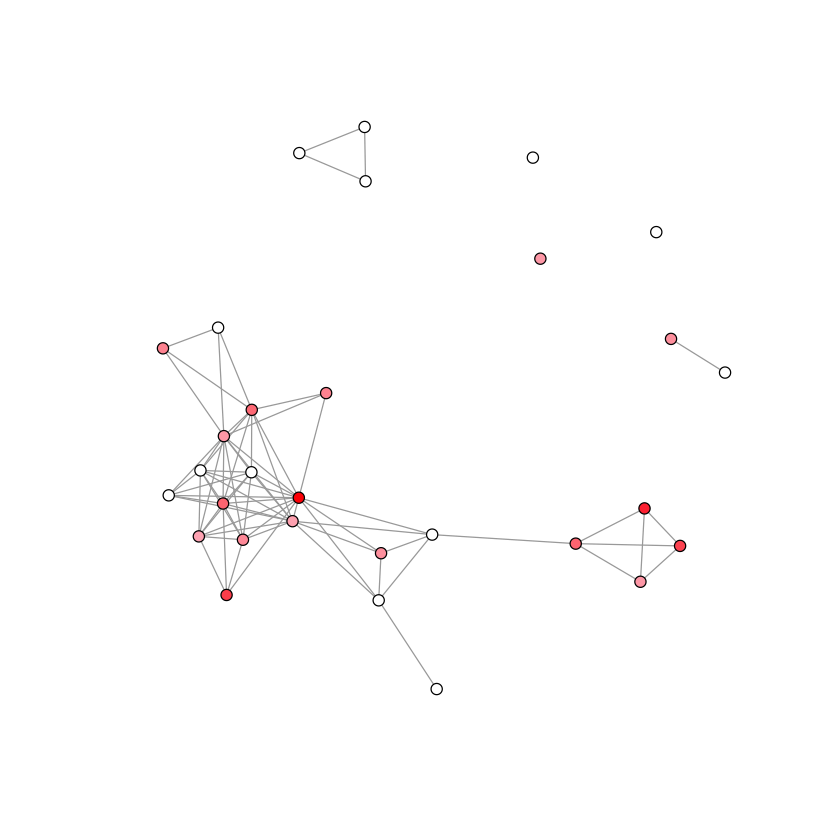

In [130]:
# 104w VS 52w
plot_GO_network(over_repr_MF, under_repr_MF, MF_network, "104w VS 52w")
plot_interactive_GO_network(over_repr_MF, under_repr_MF, MF_network, "104w VS 52w", full_go_desc)

HTML widgets cannot be represented in plain text (need html)

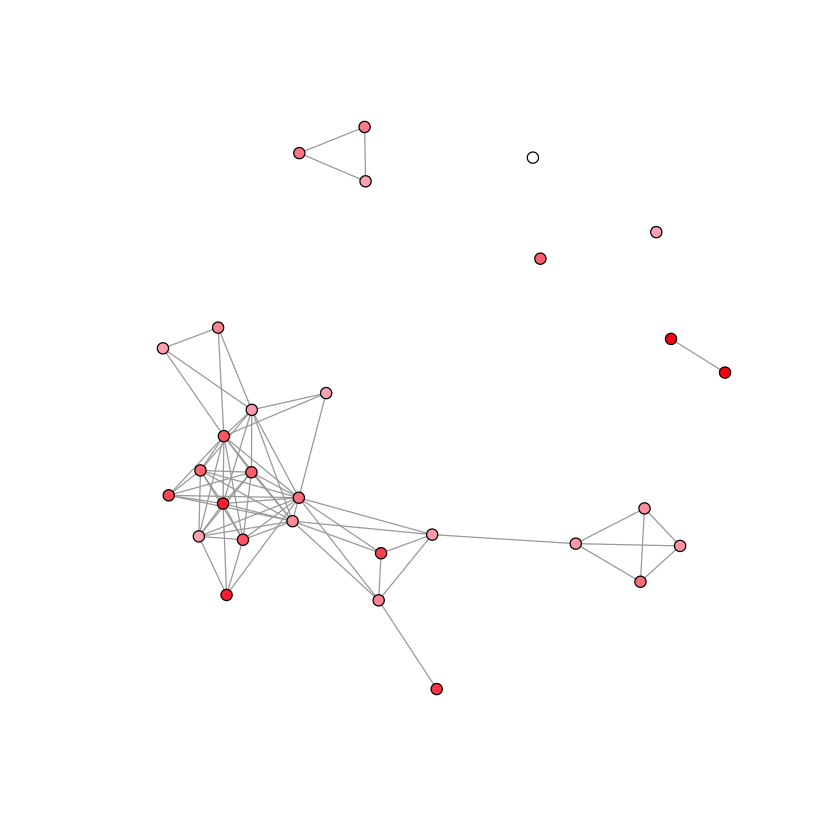

In [131]:
# 104w VS 8w
plot_GO_network(over_repr_MF, under_repr_MF, MF_network, "104w VS 8w")
plot_interactive_GO_network(over_repr_MF, under_repr_MF, MF_network, "104w VS 8w", full_go_desc)

# Comparison between the ages for the types (after controlling for gender)

Questions

- What are the differences between the ages for the different types
- Do we observe the same changes as globally?

In [ ]:
age_type_data = list(SPF_52w_8w, GF_52w_8w, SPF_104w_8w, GF_104w_8w, SPF_104w_52w, GF_104w_52w)
names(age_type_data) = c("52w VS 8w (SPF)", "52w VS 8w (GF)", "104w VS 8w (SPF)", "104w VS 8w (GF)", "104w VS 52w (SPF)", "104w VS 52w (GF)")
age_type_deg = extract_diff_expr_genes(age_type_data, "age_type_data")

In [ ]:
SPF_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2')
GF_samples = c(
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender")])

## Counts

In [ ]:
# 52w != 8w or 104w != 8w or 104w != 52w for SPF with abs(FC) > 2
genes = names((sort(age_type_deg$fc_deg[which(abs(age_type_deg$fc_deg[,1])>1 | abs(age_type_deg$fc_deg[,3])>1 | abs(age_type_deg$fc_deg[,5])>1),1])))
plot_count_heatmap(genes,SPF_samples, annot)

In [ ]:
# 52w != 8w or 104w != 8w or 104w != 52w for GF with abs(FC) > 2
genes = names((sort(age_type_deg$fc_deg[which(abs(age_type_deg$fc_deg[,2])>1 | abs(age_type_deg$fc_deg[,4])>1 | abs(age_type_deg$fc_deg[,6])>1),2])))
plot_count_heatmap(genes,GF_samples, annot)

## Comparison of the numbers per types

In [ ]:
# Differentially expressed genes
upset(as.data.frame(age_type_deg$deg),nsets = 6)

In [ ]:
# Differentially more expressed genes
upset(as.data.frame(age_type_deg$pos),nsets = 6)

In [ ]:
# Differentially less expressed genes
upset(as.data.frame(age_type_deg$neg),nsets = 6)

## Comparison with the global numbers

### 52w vs 8w

In [ ]:
# 52w vs 8w
type_data_52w_8w = list(SPF_52w_8w, GF_52w_8w, global_52w_8w)
names(type_data_52w_8w) = c("52w VS 8w (SPF)", "52w VS 8w (GF)", "52w VS 8w (global)")
type_deg_52w_8w = extract_diff_expr_genes(type_data_52w_8w, "type_data_52w_8w")

In [ ]:
# Differentially expressed genes
upset(as.data.frame(type_deg_52w_8w$deg))

### 104w vs 8w

In [ ]:
type_data_104w_8w = list(SPF_104w_8w, GF_104w_8w, global_104w_8w)
names(type_data_104w_8w) = c("104w VS 8w (SPF)", "104w VS 8w (GF)", "104w VS 8w (global)")
type_deg_104w_8w = extract_diff_expr_genes(type_data_104w_8w, "type_data_104w_8w")

In [ ]:
# Differentially expressed genes
upset(as.data.frame(type_deg_104w_8w$deg))

### 104w vs 52w

In [ ]:
type_data_104w_52w = list(SPF_104w_52w, GF_104w_52w, global_104w_52w)
names(type_data_104w_52w) = c("104w VS 52w (SPF)", "104w VS 52w (GF)", "104w VS 52w (global)")
type_deg_104w_52w = extract_diff_expr_genes(type_data_104w_52w, "type_data_104w_52w")

In [ ]:
# Differentially expressed genes
upset(as.data.frame(type_deg_104w_52w$deg))

## SPF effect in aging

Question: Is there any genes that shows an increasing fold change in SPF with aging while not for GF?

| 52w vs 8w for SPF | 52w vs 8w for GF | 104w vs 52w for SPF | 104w vs 52w for GF | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != |  | != |  | 244
Set 2 | != | == | != | == | 92 


In [ ]:
# set extractions
set1 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,1]) & !is.na(age_type_deg$fc_deg[,5]),])
set2 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,1]) & is.na(age_type_deg$fc_deg[,2]) & !is.na(age_type_deg$fc_deg[,5]) & is.na(age_type_deg$fc_deg[,6]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_type_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_type_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0

In [ ]:
# plots of the differences
plot(set1_fc[,"52w VS 8w (SPF)"], set1_fc[,"104w VS 52w (SPF)"], xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)", pch = 20, col = rgb(0,0,1,alpha=0.5))
points(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"], pch = 20, col = rgb(1,0,0,alpha=0.5))
legend("topright", pch = 20, col = c(rgb(0,0,1,alpha=0.5),rgb(1,0,0,alpha=0.5)), legend=c("Changing in SPF", "Changing in SPF but not in GF"), cex = 0.7)
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))

### Genes with differential expression with aging in SPF but not in GF

In [ ]:
aging_SPF_diff = cbind(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"])
colnames(aging_SPF_diff) = c("52w VS 8w (SPF)","104w VS 52w (SPF)")

In [ ]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) > 0
pos_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(pos_1_pos_2)
plot(pos_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

In [ ]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) < 0
pos_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(pos_1_neg_2)
plot(pos_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

In [ ]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) > 0
neg_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(neg_1_pos_2)
plot(neg_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

In [ ]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) < 0
neg_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(neg_1_neg_2)
plot(neg_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

![](../results/dge/img/male_delayed_genes.png)

# Comparison between the ages for the genders (after controlling for type)

Questions

- What are the differences between the ages for the different genders?
- Do we observe the same changes as globally?

In [ ]:
age_gender_data = list(F_52w_8w, M_52w_8w, F_104w_8w, M_104w_8w, F_104w_52w, M_104w_52w)
names(age_gender_data) = c("52w VS 8w (F)", "52w VS 8w (M)", "104w VS 8w (F)", "104w VS 8w (M)", "104w VS 52w (F)", "104w VS 52w (M)")
age_gender_deg = extract_diff_expr_genes(age_gender_data, "age_gender_data")

In [ ]:
M_samples = c(
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
F_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2')
annot = as.data.frame(colData(dge)[, c("age", "type")])

## Counts

In [ ]:
# 52w != 8w or 104w != 8w or 104w != 52w for F with abs(FC) > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,1])>1 | abs(age_gender_deg$fc_deg[,3])>1 | abs(age_gender_deg$fc_deg[,5])>1),1])))
plot_count_heatmap(genes,F_samples, annot)

In [ ]:
# 52w != 8w or 104w != 8w or 104w != 52w for M with abs(FC) > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,2])>1 | abs(age_gender_deg$fc_deg[,4])>1 | abs(age_gender_deg$fc_deg[,6])>1),6])))
plot_count_heatmap(genes,M_samples, annot)

In [ ]:
# Genes with 52w != 8w or 104w != 8w or 104w != 52w for M or F and at least one FC > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,1])>1|abs(age_gender_deg$fc_deg[,2])>1|abs(age_gender_deg$fc_deg[,3])>1|abs(age_gender_deg$fc_deg[,4])>1|abs(age_gender_deg$fc_deg[,5])>1|abs(age_gender_deg$fc_deg[,6])>1),1])))
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2',
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("gender", "age", "type")])
plot_count_heatmap(genes,samples, annot)

## Comparison of the numbers per types

In [ ]:
# Differentially expressed genes
upset(as.data.frame(age_gender_deg$deg),nsets = 6)

Some explanation (specially for the gender difference in microglia aging)
![](../doc/images/gender_difference_aging_hist_explanation.png)

In [ ]:
# Differentially more expressed genes
upset(as.data.frame(age_gender_deg$pos),nsets = 6)

In [ ]:
# Differentially less expressed genes
upset(as.data.frame(age_gender_deg$neg),nsets = 6)

## Comparison with the global numbers

### 52w vs 8w

In [ ]:
gender_data_52w_8w = list(F_52w_8w, M_52w_8w, global_52w_8w)
names(gender_data_52w_8w) = c("52w VS 8w (F)", "52w VS 8w (M)", "52w VS 8w (global)")
gender_deg_52w_8w = extract_diff_expr_genes(gender_data_52w_8w, "gender_data_52w_8w")

In [ ]:
upset(as.data.frame(gender_deg_52w_8w$deg))

### 104w vs 8w

In [ ]:
gender_data_104w_8w = list(F_104w_8w, M_104w_8w, global_104w_8w)
names(gender_data_104w_8w) = c("104w VS 8w (F)", "104w VS 8w (M)", "104w VS 8w (global)")
gender_deg_104w_8w = extract_diff_expr_genes(gender_data_104w_8w, "gender_data_104w_8w")

In [ ]:
upset(as.data.frame(gender_deg_104w_8w$deg))

In [ ]:
genes = names(sort(abs(gender_deg_104w_8w$fc_deg[!is.na(gender_deg_104w_8w$fc_deg[,3]),3]), decreasing = T))[1:100]
gender_deg_104w_8w$fc_deg[genes,]

In [ ]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])
genes = names((sort(gender_deg_104w_8w$fc_deg[which(abs(gender_deg_104w_8w$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

### 104w vs 52w

In [ ]:
gender_data_104w_52w = list(F_104w_52w, M_104w_52w, global_104w_52w)
names(gender_data_104w_52w) = c("104w VS 52w (F)", "104w VS 52w (M)", "104w VS 52w (global)")
gender_deg_104w_52w = extract_diff_expr_genes(gender_data_104w_52w, "gender_data_104w_52w")

In [ ]:
upset(as.data.frame(gender_deg_104w_52w$deg))

In [ ]:
genes = names(sort(abs(gender_deg_104w_52w$fc_deg[!is.na(gender_deg_104w_52w$fc_deg[,3]),3]), decreasing = T))[1:100]
gender_deg_104w_52w$fc_deg[genes,]

In [ ]:
samples = c(
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])
genes = names((sort(gender_deg_104w_52w$fc_deg[which(abs(gender_deg_104w_52w$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

## Gender differences in aging

Question: Is there differences in aging between gender? Is there really a delay for some genes in male?

| 52w vs 8w for F | 52w vs 8w for M | 104w vs 52w for F | 104w vs 52w for M | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != | == | == | != | 729
Set 2 | == | != | != | == | 9

In [ ]:
# set extractions
set1 = rownames(age_gender_deg$fc_deg[!is.na(age_gender_deg$fc_deg[,1]) & is.na(age_gender_deg$fc_deg[,2]) & is.na(age_gender_deg$fc_deg[,5]) & !is.na(age_gender_deg$fc_deg[,6]),])
set2 = rownames(age_gender_deg$fc_deg[is.na(age_gender_deg$fc_deg[,1]) & !is.na(age_gender_deg$fc_deg[,2]) & !is.na(age_gender_deg$fc_deg[,5]) & is.na(age_gender_deg$fc_deg[,6]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_gender_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_gender_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0
# plots of the differences
plot(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"], main="Set 1", xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
plot(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"], main="Set 2", xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w VS 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))

In [ ]:
investigate_enrichement = function(set, all_genes){
    deg = 1*(all_genes %in% set)
    names(deg) = all_genes
    pwf = nullp(deg, 'mm10', 'geneSymbol', plot.fit=F)
    res = matrix(0,nrow=2,ncol=2, dimnames=list(c("over", "under"),c("GO","KEGG")))
    # GO
    GO_wall = goseq(pwf,'mm10', 'geneSymbol')
    over_represented_GO = GO_wall[GO_wall$over_represented_pvalue < 0.05,c("category","term","ontology")]
    under_represented_GO = GO_wall[GO_wall$under_represented_pvalue < 0.05,c("category","term","ontology")]
    res[1,1] = dim(over_represented_GO)[1]
    res[2,1] = dim(under_represented_GO)[1]
    # plot ontology barplot
    GO_ontology_counts = merge(count(over_represented_GO, var="ontology"), count(under_represented_GO, var="ontology"), by="ontology")
    rownames(GO_ontology_counts) = GO_ontology_counts[,1]
    GO_ontology_counts = GO_ontology_counts[,-1]
    colnames(GO_ontology_counts) = c("over_represented_GO", "under_represented_GO")
    GO_ontology_counts = as.matrix(GO_ontology_counts)
    barplot(t(GO_ontology_counts), beside = TRUE, col=c("green4", "red4"))
    legend("topright", c("over", "under"), fill=c("green4", "red4"))
    # KEGG pathways
    KEGG_wall = goseq(pwf,'mm10', 'geneSymbol', test.cats="KEGG")
    over_represented_KEGG = KEGG_wall[KEGG_wall$over_represented_pvalue < 0.05,]
    under_represented_KEGG = KEGG_wall[KEGG_wall$under_represented_pvalue < 0.05,]
    res[1,2] = dim(over_represented_KEGG)[1]
    res[2,2] = dim(under_represented_KEGG)[1]
    print(res)
}
investigate_gene_set = function(mat){
    print(dim(mat)[1])
    print(cor.test(mat[,1],mat[,2]))     
}

### Genes with differential expression delayed in male

Genes (set 1):
- Differentially expressed between 52w and 8w in F
- Not differentially expressed between 104w and 52w in F
- Not differentially expressed between 52w and 8w in M
- Differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

![](../doc/images/male_delayed_gene_analysis_explanation.png)

In [ ]:
# How the genes changed in the first phase (between 8w and 52w) in Female change in the second phase (between 52w and 104w) for the Male
aging_gender_diff = cbind(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"])
colnames(aging_gender_diff) = c("52w VS 8w (F)","104w VS 52w (M)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(extr[,1],extr[,2], labels = rownames(extr), pos=3, cex=0.5)

In [ ]:
investigate_enrichement(rownames(aging_gender_diff),rownames(age_gender_deg$deg))

In [ ]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0
F_pos_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_pos_M_pos_set_1)
#investigate_enrichement(rownames(F_pos_M_pos_set_1),rownames(age_gender_deg$deg))

In [ ]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0
F_pos_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_pos_M_neg_set_1)
#investigate_enrichement(rownames(F_pos_M_neg_set_1),rownames(age_gender_deg$deg))


In [ ]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0
F_neg_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_neg_M_pos_set_1)
#investigate_enrichement(rownames(F_neg_M_pos_set_1),rownames(age_gender_deg$deg))

In [ ]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0
F_neg_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_neg_M_neg_set_1)
#investigate_enrichement(rownames(F_neg_M_neg_set_1),rownames(age_gender_deg$deg))

![](../results/dge/img/male_delayed_genes.png)

### Genes with differential expression delayed in female

Genes (set 2):
- Not differentially expressed between 52w and 8w in F
- Differentially expressed between 104w and 52w in F
- Differentially expressed between 52w and 8w in M
- Not differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

In [ ]:
# How the genes changed in the first phase (between 8w and 52w) in Male change in the second phase (between 52w and 104w) for the Female
aging_gender_diff = cbind(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"])
colnames(aging_gender_diff) = c("52w VS 8w (M)","104w VS 52w (F)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w vs 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
#extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(aging_gender_diff[,1],aging_gender_diff[,2], labels = rownames(aging_gender_diff), cex=0.5)

# Comparison between the ages for the genders and types

Questions
- What are the differences between the ages for the different combinations of gender and types?
- Do we observe the same changes as globally?

In [ ]:
age_type_gender_data = list(F_SPF_52w_8w, F_GF_52w_8w, M_SPF_52w_8w, M_GF_52w_8w,F_SPF_104w_8w,F_GF_104w_8w,M_SPF_104w_8w,M_GF_104w_8w,F_SPF_104w_52w,F_GF_104w_52w,M_SPF_104w_52w,M_GF_104w_52w)
names(age_type_gender_data) = c("52w VS 8w (F, SPF)", "52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)","104w VS 52w (F, SPF)", "104w VS 52w (F, GF)","104w VS 52w (M, SPF)", "104w VS 52w (M, GF)")
age_type_gender_deg = extract_diff_expr_genes(age_type_gender_data, "age_type_gender_data")

## Comparison of the numbers per types

In [ ]:
upset(as.data.frame(age_type_gender_deg$deg), nsets = 12, nintersects=50)

## Comparison with the global numbers

### 52w vs 8w

In [ ]:
gender_type_data_52w_8w = list(F_SPF_52w_8w, F_GF_52w_8w, M_SPF_52w_8w, M_GF_52w_8w, global_52w_8w)
names(gender_type_data_52w_8w) = c("52w VS 8w (F, SPF)", "52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "52w VS 8w (global)")
gender_type_deg_52w_8w = extract_diff_expr_genes(gender_type_data_52w_8w, "gender_type_data_52w_8w")

In [ ]:
upset(as.data.frame(gender_type_deg_52w_8w$deg))

### 104w vs 8w

In [ ]:
gender_type_data_104w_8w = list(F_SPF_104w_8w, F_GF_104w_8w, M_SPF_104w_8w, M_GF_104w_8w, global_104w_8w)
names(gender_type_data_104w_8w) = c("104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)", "104w VS 8w (global)")
gender_type_deg_104w_8w = extract_diff_expr_genes(gender_type_data_104w_8w, "gender_type_data_104w_8w")

In [ ]:
upset(as.data.frame(gender_type_deg_104w_8w$deg))

### 104w vs 52w

In [ ]:
gender_type_data_104w_52w = list(F_SPF_104w_52w, F_GF_104w_52w, M_SPF_104w_52w, M_GF_104w_52w, global_104w_52w)
names(gender_type_data_104w_52w) = c("104w VS 52w (F, SPF)", "104w VS 52w (F, GF)", "104w VS 52w (M, SPF)", "104w VS 52w (M, GF)", "104w VS 52w (global)")
gender_type_deg_104w_52w = extract_diff_expr_genes(gender_type_data_104w_52w, "gender_type_data_104w_52w")

In [ ]:
upset(as.data.frame(gender_type_deg_104w_52w$deg))